# Plot NMOS and PMOS comparison

Import libs

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

### Fazer dois graficos para NMOS e para PMOS  
Y = gm / gds   
X = gm / Id    

Y =( gm / cgs ) / ( 2pi )   
X = gm / Id  

#### Constantes

In [18]:
# length sizes of the transistors
Lsizes = [120, 200, 300, 400, 600, 800, 1000, 1500, 2000]



#### NMOS

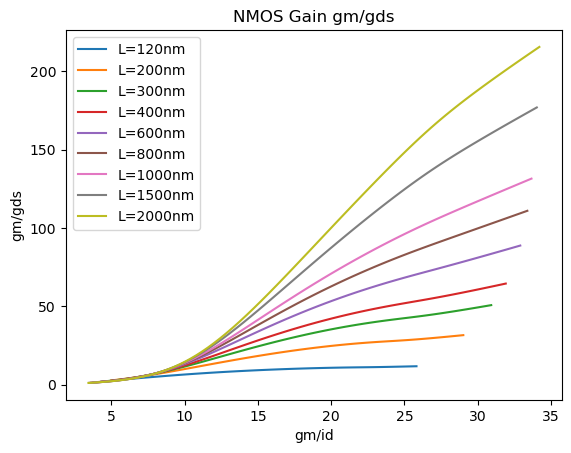

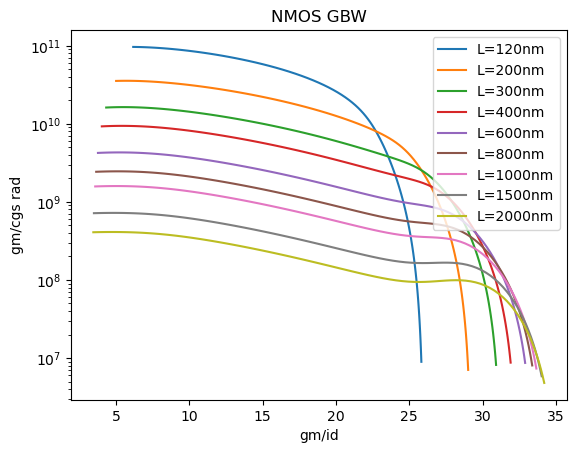

In [19]:

df_NMOS = []

# read the csv files and store the data in a list of dataframes
for i in range(0, len(Lsizes)):
        df_CSV_nmos = pd.read_csv('Resultados/NMOS_W5u_L' + str(Lsizes[i]) + 'n_Vds200m.csv')
        df_aux = pd.DataFrame()
        df_aux["gm_over_id"] = df_CSV_nmos["NM0:gm Y"]/df_CSV_nmos["NM0:id Y"]
        df_aux["gm_over_gds"] = df_CSV_nmos["NM0:gm Y"]/df_CSV_nmos["NM0:gds Y"]
        df_aux["gm_over_cgs_rad"] = df_CSV_nmos["NM0:gm Y"]/abs(df_CSV_nmos["NM0:cgs Y"]*(2*math.pi))
        df_aux["cdb"] = abs(df_CSV_nmos["NM0:cdb Y"])
        df_aux["gds"] = df_CSV_nmos["NM0:gds Y"]
        df_NMOS.append(df_aux)

# Plot gm/gds vs gm/id of the NMOS transistors
plt.figure(1)
plt.title("NMOS Gain gm/gds")
plt.ylabel("gm/gds")
plt.xlabel("gm/id")
for i in range(0, len(Lsizes)):
        plt.plot(df_NMOS[i]["gm_over_id"],df_NMOS[i]["gm_over_gds"], label="L=" + str(Lsizes[i]) + "nm")
plt.legend()

# Plot gm/cgs rad vs gm/id of the NMOS transistors
plt.figure(2)
plt.title("NMOS GBW")
plt.yscale('log')
plt.ylabel("gm/cgs rad")
plt.xlabel("gm/id")
for i in range(0, len(Lsizes)):
        plt.plot(df_NMOS[i]["gm_over_id"],df_NMOS[i]["gm_over_cgs_rad"], label="L=" + str(Lsizes[i]) + "nm")
plt.legend()


NMOS:  
L= 600 nm   
gm/id = 25      

8GHz    
60dB   

In [20]:
# L_nmos_index = 4
# gm_over_id_nmos = 25
gm_nmos=690e-6
# Id_nmos = gm_nmos/gm_over_id_nmos

### PMOS

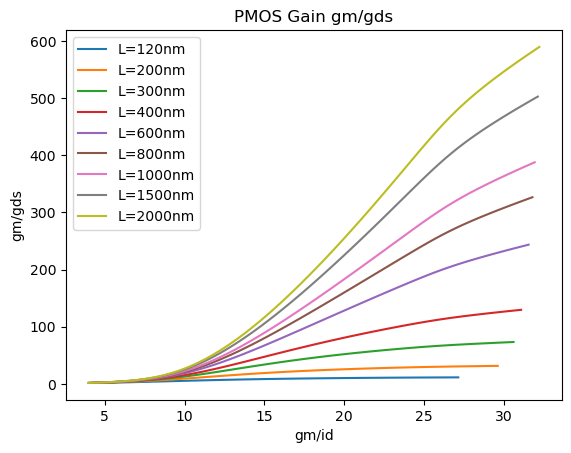

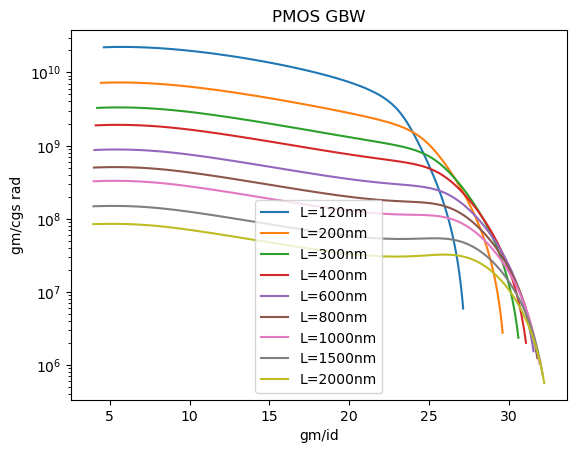

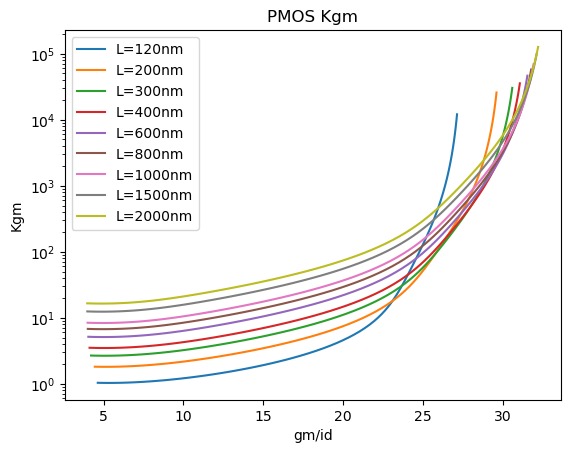

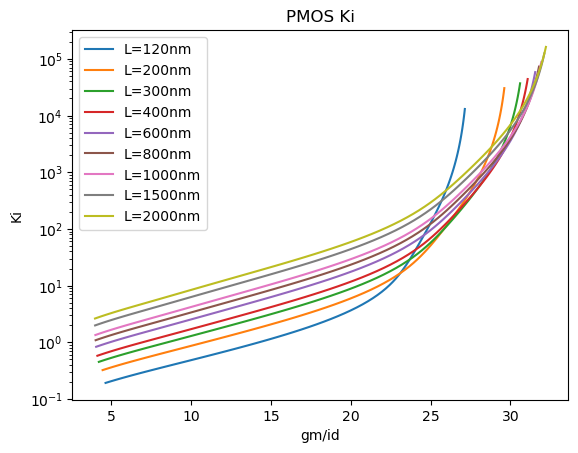

In [21]:
df_PMOS = []

# read the csv files and store the data in a list of dataframes
for i in range(0, len(Lsizes)):
        df_CSV_pmos = pd.read_csv('Resultados/PMOS_W5u_L' + str(Lsizes[i]) + 'n_Vds200m.csv')
        df_aux = pd.DataFrame()
        df_aux["gm_over_id"] = abs(df_CSV_pmos["PM0:gm Y"]/df_CSV_pmos["PM0:id Y"])
        df_aux["gm_over_gds"] = df_CSV_pmos["PM0:gm Y"]/df_CSV_pmos["PM0:gds Y"]
        df_aux["gm_over_cgs_rad"] = df_CSV_pmos["PM0:gm Y"]/abs(df_CSV_pmos["PM0:cgs Y"]*2*math.pi)
        df_aux["gds"] = df_CSV_pmos["PM0:gds Y"]
        df_aux["Kgm"] = abs(gm_nmos/df_CSV_pmos["PM0:gm Y"]) # TESTE Kgm
        df_aux["Ki"] = abs(Id_nmos/df_CSV_pmos["PM0:id Y"]) # TESTE Ki
        df_aux["gm"] = abs(df_CSV_pmos["PM0:gm Y"])
        df_aux["cdb"] = abs(df_CSV_pmos["PM0:cdb Y"])       
        df_PMOS.append(df_aux)

# Plot the gm/gds vs gm/id of the PMOS transistors
plt.figure(1)
plt.title("PMOS Gain gm/gds")
plt.ylabel("gm/gds")
plt.xlabel("gm/id")
for i in range(0, len(Lsizes)):
        plt.plot(df_PMOS[i]["gm_over_id"],df_PMOS[i]["gm_over_gds"], label="L=" + str(Lsizes[i]) + "nm")
plt.legend()


# Plot the gm/cgs rad vs gm/id of the PMOS transistors
plt.figure(2)
plt.title("PMOS GBW")
plt.yscale('log')
plt.ylabel("gm/cgs rad")
plt.xlabel("gm/id")
for i in range(0, len(Lsizes)):
        plt.plot(df_PMOS[i]["gm_over_id"],df_PMOS[i]["gm_over_cgs_rad"], label="L=" + str(Lsizes[i]) + "nm")
plt.legend()


# # Plot the Kgm vs gm/id of the PMOS transistors
# plt.figure(3)
# plt.title("PMOS Kgm")
# plt.yscale('log')
# plt.ylabel("Kgm")
# plt.xlabel("gm/id")
# for i in range(0, len(Lsizes)):
#         plt.plot(df_PMOS[i]["gm_over_id"],df_PMOS[i]["Kgm"], label="L=" + str(Lsizes[i]) + "nm")
#         # plt.plot(df_CSV_pmos[i]["PM0:id Y"],gm_nmos/df_CSV_pmos[i]["PM0:gm Y"], label="L=" + str(Lsizes[i]) + "nm")
# plt.legend()


# # Plot the Ki vs gm/id of the PMOS transistors
# plt.figure(5)
# plt.title("PMOS Ki")
# plt.yscale('log')
# plt.ylabel("Ki")
# plt.xlabel("gm/id")
# for i in range(0, len(Lsizes)):
#         plt.plot(df_PMOS[i]["gm_over_id"],df_PMOS[i]["Ki"], label="L=" + str(Lsizes[i]) + "nm")
# plt.legend()



In [22]:
# # read the csv files and store the data in a list of dataframes
# for i in range(0, len(Lsizes)):
#         df_aux["KI"] = gm_nmos/df_CSV_pmos["PM0:gm Y"]
#         # df_aux["Kgm"] = df_CSV_pmos["PM0:gm Y"]/df_CSV_pmos["PM0:gds Y"]
#         # df_aux["gm_over_cgs_rad"] = df_CSV_pmos["PM0:gm Y"]/abs(df_CSV_pmos["PM0:cgs Y"])
#         df_PMOS.append(df_aux)

df_NMOS[0]

,gm_over_id,gm_over_gds,gm_over_cgs_rad,cdb,gds
0,25.823337,11.813138,8.949147e+06,2.692182e-15,6.900730e-09
1,25.810865,11.810258,1.044343e+07,2.692182e-15,8.054982e-09
2,25.797537,11.807195,1.218581e+07,2.692182e-15,9.401407e-09
3,25.783292,11.803935,1.421713e+07,2.692182e-15,1.097178e-08
4,25.768062,11.800463,1.658484e+07,2.692182e-15,1.280306e-08
...,...,...,...,...,...
96,7.089744,4.387014,9.548956e+10,2.702132e-15,6.067899e-04
97,6.841262,4.190240,9.588890e+10,2.702484e-15,6.391692e-04
98,6.603616,4.001108,9.619067e+10,2.702847e-15,6.727110e-04
99,6.376418,3.819707,9.640152e+10,2.703222e-15,7.074188e-04


In [23]:
df_GBW = []


for i in range(0, len(Lsizes)):
        df_aux = pd.DataFrame()
        df_aux["gm_over_id"] = df_PMOS[i]["gm_over_id"]
        df_aux["Lp"] = Lsizes[i]
        df_aux["cdb_nmos"] = df_NMOS[i]["cdb"] ## Errado
        df_aux["cdb_pmos"] = df_PMOS[i]["cdb"]
        df_aux["gm_nmos"] = df_PMOS[i]["gm"]
        df_aux["Km"] = df_PMOS[i]["Kgm"]
        df_aux["GBW"] = (df_aux["gm_nmos"] * df_aux["Km"]) / ( 11*(df_aux["cdb_nmos"] + df_aux["cdb_pmos"]))
        # df_aux["gain"] = 
        df_GBW.append(df_aux)

print(df_GBW[0])

     gm_over_id   Lp      cdb_nmos      cdb_pmos       gm_nmos            Km  \
0     27.143824  120  2.692182e-15  4.021629e-15  5.739189e-08  12022.605578   
1     27.115850  120  2.692182e-15  4.021629e-15  6.746789e-08  10227.086946   
2     27.085823  120  2.692182e-15  4.021629e-15  7.929301e-08   8701.902479   
3     27.053606  120  2.692182e-15  4.021629e-15  9.316566e-08   7406.162468   
4     27.019055  120  2.692182e-15  4.021629e-15  1.094339e-07   6305.177745   
..          ...  ...           ...           ...           ...           ...   
96     5.239570  120  2.702132e-15  4.039467e-15  6.694015e-04      1.030772   
97     5.077247  120  2.702484e-15  4.040096e-15  6.690473e-04      1.031317   
98     4.922380  120  2.702847e-15  4.040746e-15  6.683869e-04      1.032336   
99     4.774607  120  2.703222e-15  4.041418e-15  6.674526e-04      1.033781   
100    4.633575  120  2.703609e-15  4.042113e-15  6.662739e-04      1.035610   

              GBW  
0    9.343021e+09  

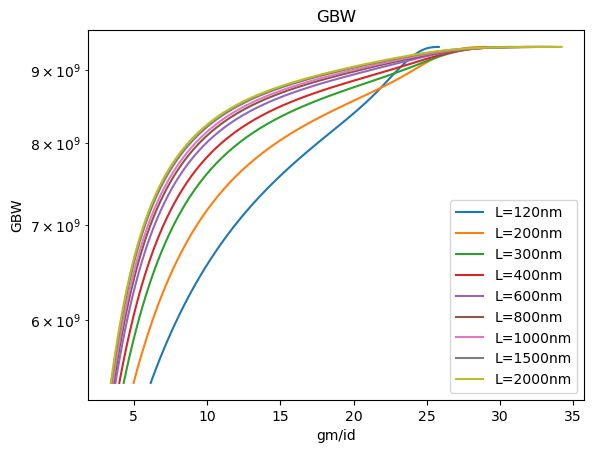

In [ ]:
# Plot gm/cgs rad vs gm/id of the NMOS transistors
plt.figure()
plt.title("GBW")
# plt.yscale('log')
plt.ylabel("GBW")
plt.yscale('log')
plt.xlabel("gm/id")
for i in range(0, len(Lsizes)):
        plt.plot(df_NMOS[i]["gm_over_id"],df_aux["GBW"], label="L=" + str(Lsizes[i]) + "nm")
plt.legend()

####  Creates a matrix that stores all the data that is needed to plot the GBW and Gain 

In [24]:
# Define the dimensions of the matrix
rows_Lnmos, cols_Lpmos = 9, 9

# Create a 9x9 matrix filled with empty arrays
df_results = [[[] for _ in range(cols_Lpmos)] for _ in range(rows_Lnmos)]

# j runs the rows (L_NMOS) and i runs the columns(L_PMOS)
for j in range(0, len(Lsizes)):
    for i in range(0, len(Lsizes)):
        df_aux = pd.DataFrame()
        df_aux["gm_over_id"] = df_PMOS[i]["gm_over_id"]
        df_aux["cdb_nmos"] = df_NMOS[j]["cdb"]
        df_aux["cdb_pmos"] = df_PMOS[i]["cdb"]
        df_aux["gm_nmos"] = df_PMOS[i]["gm"]
        df_aux["gds_pmos"] = df_PMOS[i]["gds"]
        df_aux["gds_nmos"] = df_NMOS[i]["gds"]
        df_aux["Km"] = df_PMOS[i]["Kgm"]
        df_aux["GBW"] = (df_aux["gm_nmos"] * df_aux["Km"]) / ( 11*(df_aux["cdb_nmos"] + df_aux["cdb_pmos"]))
        df_aux["gain"] = (df_aux["gm_nmos"] * df_aux["Km"]) / (df_aux["gds_nmos"] + df_aux["gds_pmos"])
        df_results[j][i].append(df_aux)

print(df_results)




[[[     gm_over_id      cdb_nmos      cdb_pmos       gm_nmos      gds_pmos  \
0     27.143824  2.692182e-15  4.021629e-15  5.739189e-08  5.077156e-09   
1     27.115850  2.692182e-15  4.021629e-15  6.746789e-08  5.970166e-09   
2     27.085823  2.692182e-15  4.021629e-15  7.929301e-08  7.018612e-09   
3     27.053606  2.692182e-15  4.021629e-15  9.316566e-08  8.249123e-09   
4     27.019055  2.692182e-15  4.021629e-15  1.094339e-07  9.692778e-09   
..          ...           ...           ...           ...           ...   
96     5.239570  2.702132e-15  4.039467e-15  6.694015e-04  3.406115e-04   
97     5.077247  2.702484e-15  4.040096e-15  6.690473e-04  3.569716e-04   
98     4.922380  2.702847e-15  4.040746e-15  6.683869e-04  3.735549e-04   
99     4.774607  2.703222e-15  4.041418e-15  6.674526e-04  3.903387e-04   
100    4.633575  2.703609e-15  4.042113e-15  6.662739e-04  4.073019e-04   

         gds_nmos            Km           GBW          gain  
0    6.900730e-09  12022.605578  9

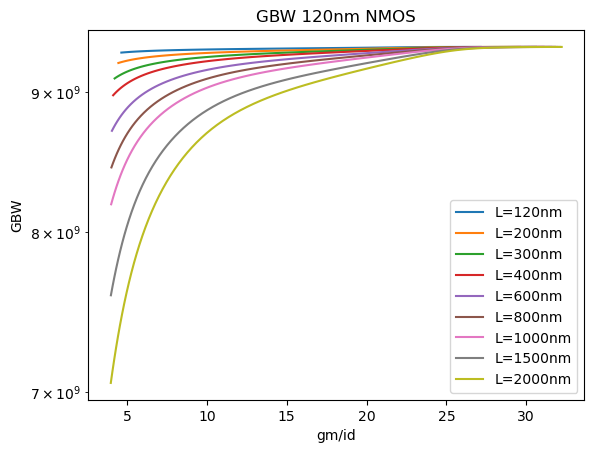

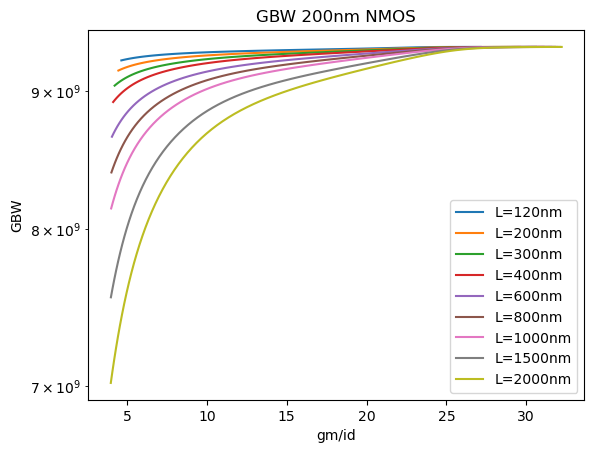

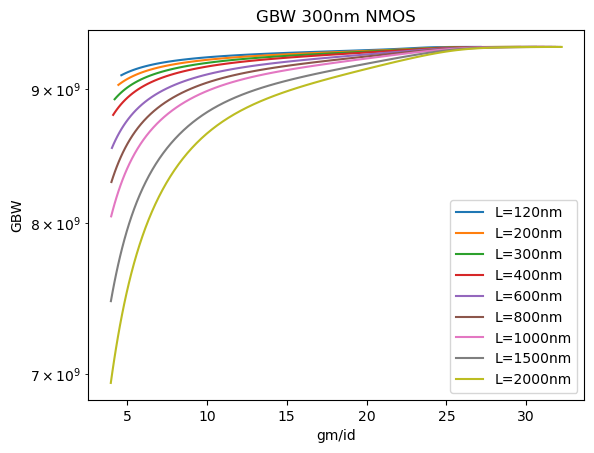

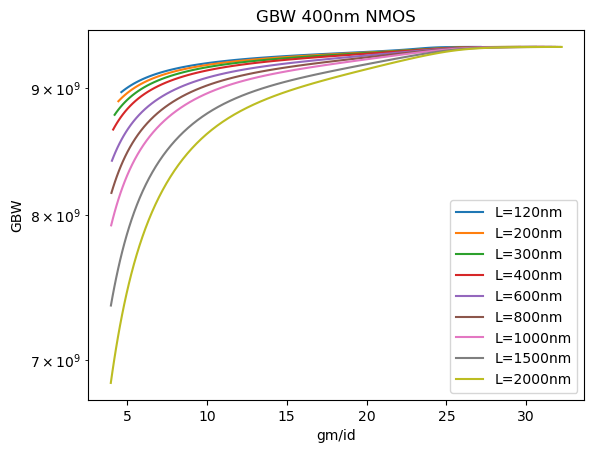

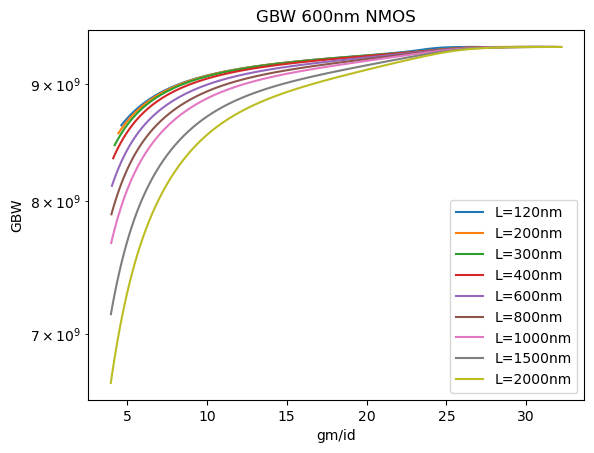

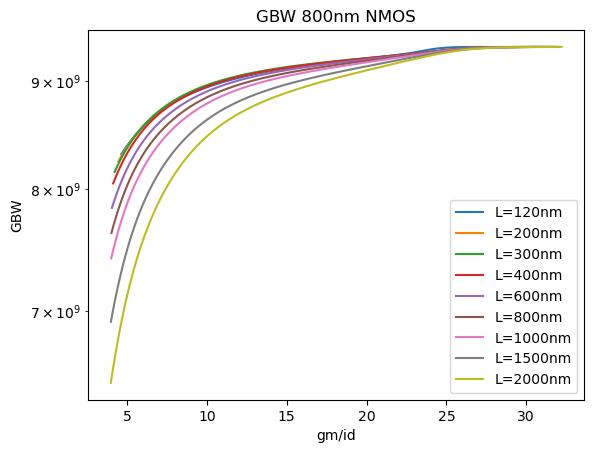

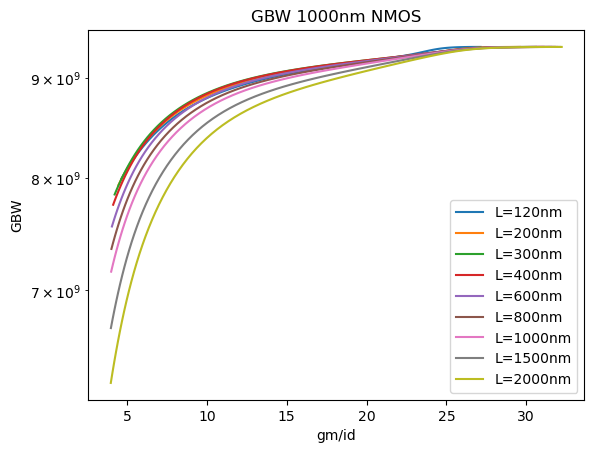

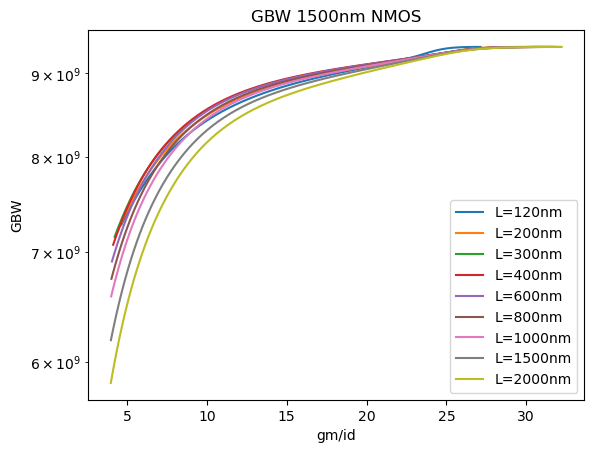

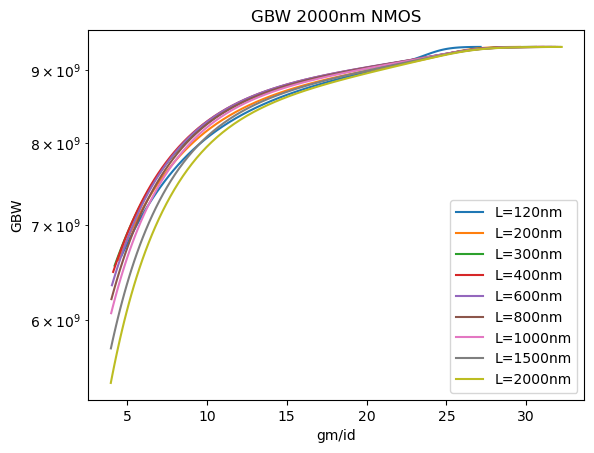

In [ ]:
# j runs the rows (L_NMOS) and i runs the columns(L_PMOS)
for j in range(0, len(Lsizes)):
    plt.figure()
    plt.title("GBW "+ str(Lsizes[j]) + "nm NMOS")
    # plt.yscale('log')
    plt.ylabel("GBW")
    # plt.yscale('log')
    plt.xlabel("gm/id")
    
    for i in range(0, len(Lsizes)):
        # plt.plot(df_NMOS[x]["gm_over_id"],df_aux["GBW"], label="L=" + str(Lsizes[x]) + "nm")
        # plt.plot(df_results[j][i][x]["gm_over_id"],df_results[j][i][x]["GBW"], label="L=" + str(Lsizes[x]) + "nm")
        plt.plot(df_results[j][i][0]["gm_over_id"],df_results[j][i][0]["GBW"], label="L=" + str(Lsizes[i]) + "nm")
    
    plt.legend()
    
    plt.savefig('.\GBW plots\GBW plot L_NMOS=' + str(Lsizes[j]) + '.png')


Ganho

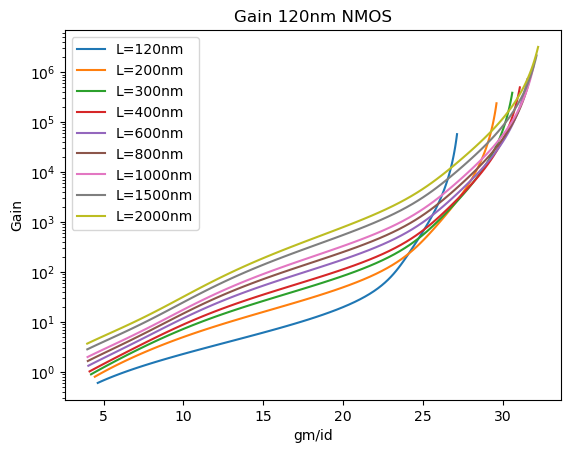

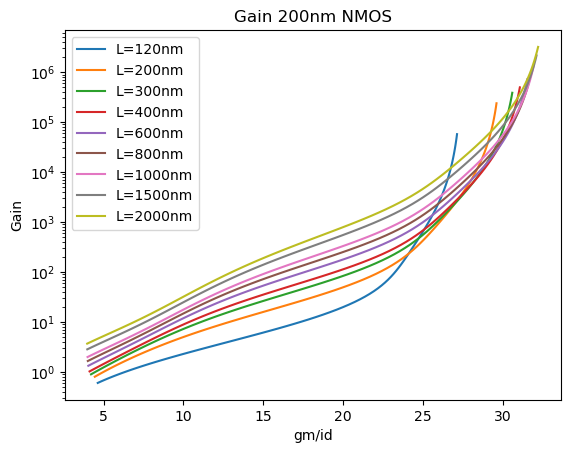

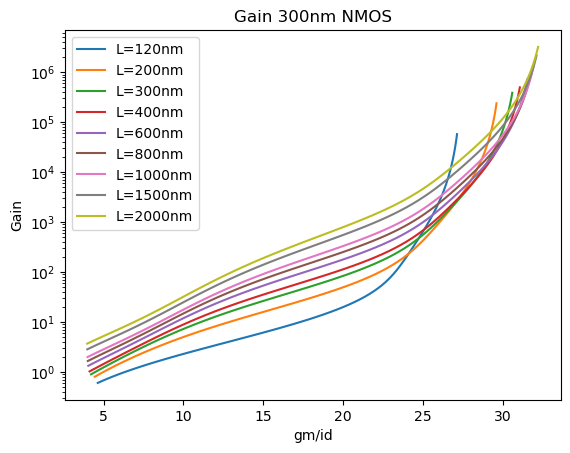

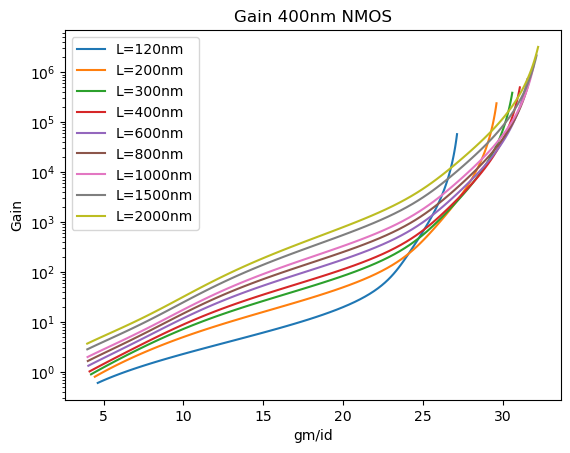

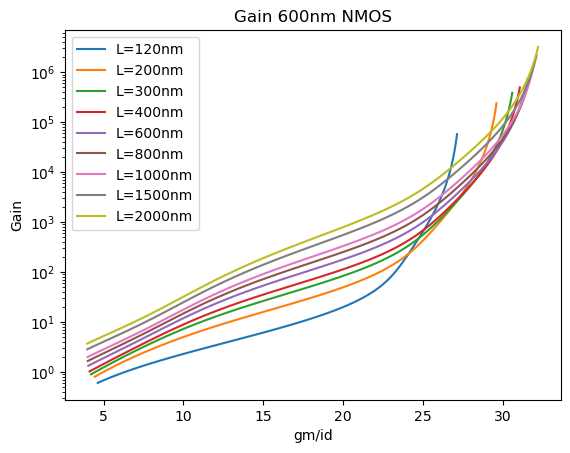

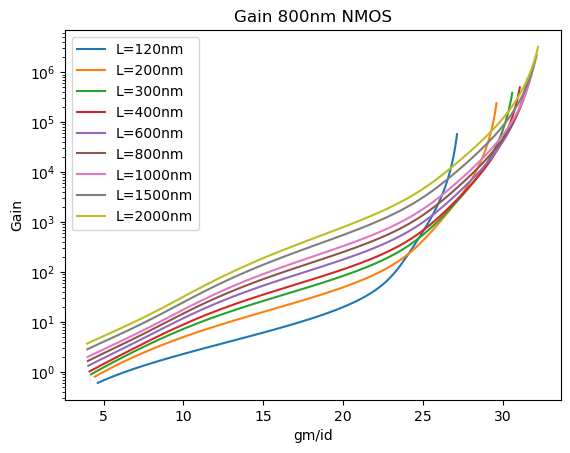

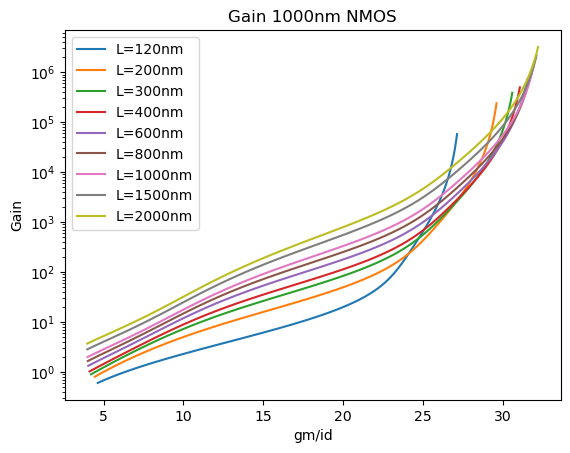

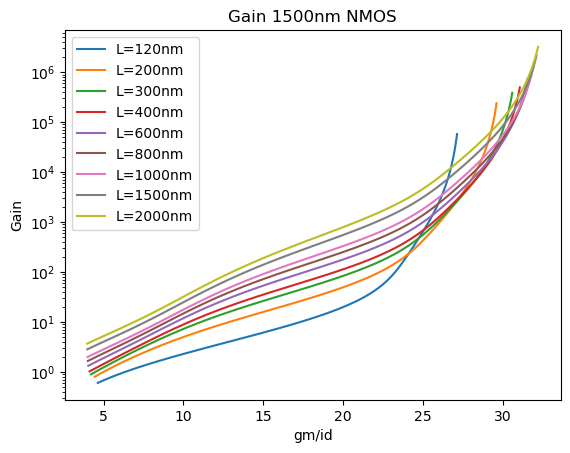

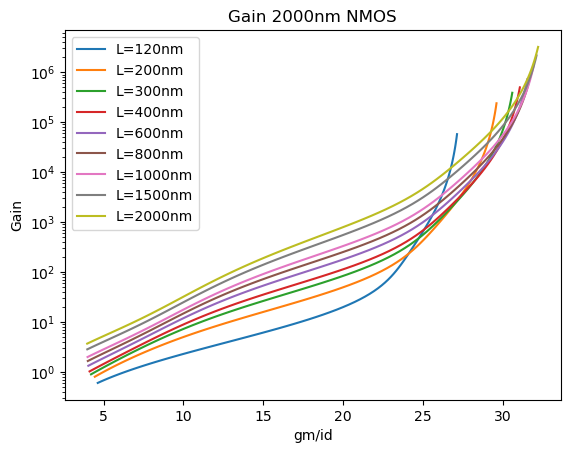

In [26]:
# j runs the rows (L_NMOS) and i runs the columns(L_PMOS)
for j in range(0, len(Lsizes)):
    plt.figure()
    plt.title("Gain "+ str(Lsizes[j]) + "nm NMOS")
    plt.ylabel("Gain")
    plt.yscale('log')
    plt.xlabel("gm/id")
    
    for i in range(0, len(Lsizes)):
        plt.plot(df_results[j][i][0]["gm_over_id"],df_results[j][i][0]["gain"], label="L=" + str(Lsizes[i]) + "nm")
    
    plt.legend()
    
    plt.savefig('.\gain plots\gain plot L_NMOS=' + str(Lsizes[j]) + '.png')